In [1]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure reproducibility
np.random.seed(42)

In [2]:
# STEP 2: Create book catalog

books = [
    "Leaders Eat Last",
    "Good to Great",
    "The 7 Habits of Highly Effective People",
    "Dare to Lead",
    "Start With Why",
    "Extreme Ownership",
    "The Leadership Challenge",
    "Drive",
    "The Effective Executive",
    "Principles of Leadership"
]

categories = [
    "Executive Leadership",
    "Organizational Leadership",
    "Personal Leadership",
    "Emotional Intelligence",
    "Strategic Leadership"
]

formats = ["Hardcover", "Paperback", "eBook", "Audiobook"]

catalog = pd.DataFrame({
    "Book_ID": range(1, len(books)+1),
    "Book_Title": books,
    "Category": np.random.choice(categories, len(books)),
    "Format": np.random.choice(formats, len(books)),
    "Price": np.round(np.random.uniform(10, 35, len(books)), 2)
})

catalog

,Book_ID,Book_Title,Category,Format,Price
0,1,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31
1,2,Good to Great,Strategic Leadership,Audiobook,14.55
2,3,The 7 Habits of Highly Effective People,Personal Leadership,Audiobook,14.59
3,4,Dare to Lead,Strategic Leadership,eBook,17.61
4,5,Start With Why,Strategic Leadership,Paperback,23.12
5,6,Extreme Ownership,Organizational Leadership,Hardcover,20.80
6,7,The Leadership Challenge,Personal Leadership,Paperback,17.28
7,8,Drive,Personal Leadership,Audiobook,25.30
8,9,The Effective Executive,Personal Leadership,Audiobook,13.49
9,10,Principles of Leadership,Strategic Leadership,Paperback,17.30


In [3]:
# STEP 3: Generate monthly sales

months = pd.date_range("2024-01-01", "2025-12-01", freq="MS")

regions = ["UK", "USA", "Europe", "Canada", "Australia"]

sales_data = []

for month in months:
    for book_id in catalog["Book_ID"]:
        for region in regions:
            
            units = np.random.poisson(40)
            
            sales_data.append({
                "Month": month,
                "Book_ID": book_id,
                "Region": region,
                "Units_Sold": units
            })

sales = pd.DataFrame(sales_data)
sales.head()

,Month,Book_ID,Region,Units_Sold
0,2024-01-01,1,UK,37
1,2024-01-01,1,USA,46
2,2024-01-01,1,Europe,40
3,2024-01-01,1,Canada,33
4,2024-01-01,1,Australia,46


In [4]:
# STEP 4: Merge catalog and sales

sales = sales.merge(catalog, on="Book_ID")
sales.head()

,Month,Book_ID,Region,Units_Sold,Book_Title,Category,Format,Price
0,2024-01-01,1,UK,37,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31
1,2024-01-01,1,USA,46,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31
2,2024-01-01,1,Europe,40,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31
3,2024-01-01,1,Canada,33,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31
4,2024-01-01,1,Australia,46,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31


In [5]:
# STEP 5: Financial calculations

sales["Revenue"] = sales["Units_Sold"] * sales["Price"]

# Cost is 40–60% of price
sales["Cost_Per_Unit"] = sales["Price"] * np.random.uniform(0.4, 0.6, len(sales))

sales["Cost"] = sales["Cost_Per_Unit"] * sales["Units_Sold"]

sales["Profit"] = sales["Revenue"] - sales["Cost"]

sales["Profit_Margin"] = sales["Profit"] / sales["Revenue"]

sales.head()

,Month,Book_ID,Region,Units_Sold,Book_Title,Category,Format,Price,Revenue,Cost_Per_Unit,Cost,Profit,Profit_Margin
0,2024-01-01,1,UK,37,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,566.47,8.154251,301.707269,264.762731,0.467391
1,2024-01-01,1,USA,46,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,704.26,8.395687,386.201581,318.058419,0.451621
2,2024-01-01,1,Europe,40,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,612.40,8.721879,348.875140,263.524860,0.430315
3,2024-01-01,1,Canada,33,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,505.23,7.418091,244.796990,260.433010,0.515474
4,2024-01-01,1,Australia,46,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,704.26,7.051574,324.372424,379.887576,0.539414


In [6]:
# STEP 6: Customer demographics

age_groups = ["18-25", "26-35", "36-45", "46-55", "56+"]
genders = ["Male", "Female", "Other"]
job_levels = ["Student", "Employee", "Manager", "Executive", "CEO"]

demographics = []

for i in range(len(sales)):
    
    demographics.append({
        "Age_Group": np.random.choice(age_groups),
        "Gender": np.random.choice(genders),
        "Job_Level": np.random.choice(job_levels)
    })

demographics_df = pd.DataFrame(demographics)

sales = pd.concat([sales, demographics_df], axis=1)

sales.head()

,Month,Book_ID,Region,Units_Sold,Book_Title,Category,Format,Price,Revenue,Cost_Per_Unit,Cost,Profit,Profit_Margin,Age_Group,Gender,Job_Level
0,2024-01-01,1,UK,37,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,566.47,8.154251,301.707269,264.762731,0.467391,26-35,Female,Executive
1,2024-01-01,1,USA,46,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,704.26,8.395687,386.201581,318.058419,0.451621,46-55,Male,Executive
2,2024-01-01,1,Europe,40,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,612.40,8.721879,348.875140,263.524860,0.430315,56+,Male,Student
3,2024-01-01,1,Canada,33,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,505.23,7.418091,244.796990,260.433010,0.515474,56+,Female,Manager
4,2024-01-01,1,Australia,46,Leaders Eat Last,Emotional Intelligence,Audiobook,15.31,704.26,7.051574,324.372424,379.887576,0.539414,56+,Other,Manager


In [7]:
# STEP 7: Save dataset

sales.to_csv("leadership_books_sales_dataset.csv", index=False)

print("Dataset saved successfully.")

Dataset saved successfully.


In [8]:
# STEP 8: Profit analysis

profit_summary = sales.groupby("Book_Title")["Profit"].sum().sort_values(ascending=False)

profit_summary

Book_Title
Drive                                      62090.481849
Start With Why                             55743.754546
Extreme Ownership                          49050.611547
Principles of Leadership                   43041.221316
Dare to Lead                               41973.009405
The Leadership Challenge                   41593.557370
Leaders Eat Last                           37687.123998
The 7 Habits of Highly Effective People    34862.345601
Good to Great                              34477.335376
The Effective Executive                    31700.525318
Name: Profit, dtype: float64

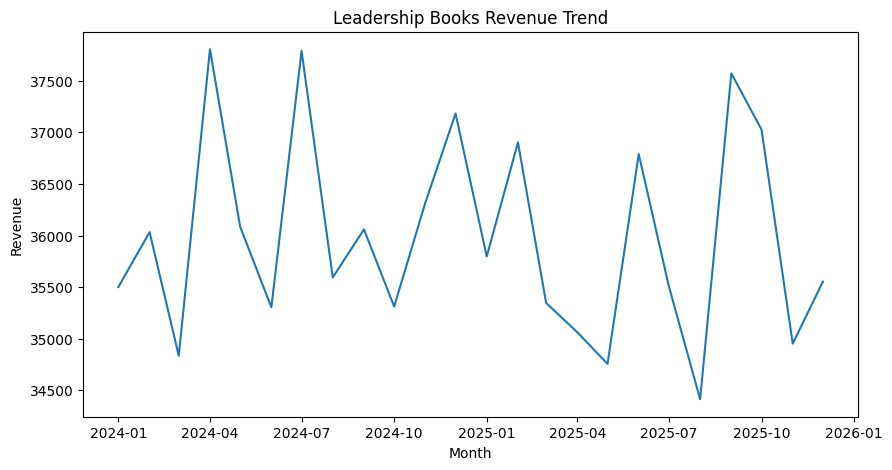

In [9]:
# STEP 9: Plot revenue trend

monthly_revenue = sales.groupby("Month")["Revenue"].sum()

plt.figure(figsize=(10,5))
plt.plot(monthly_revenue)
plt.title("Leadership Books Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

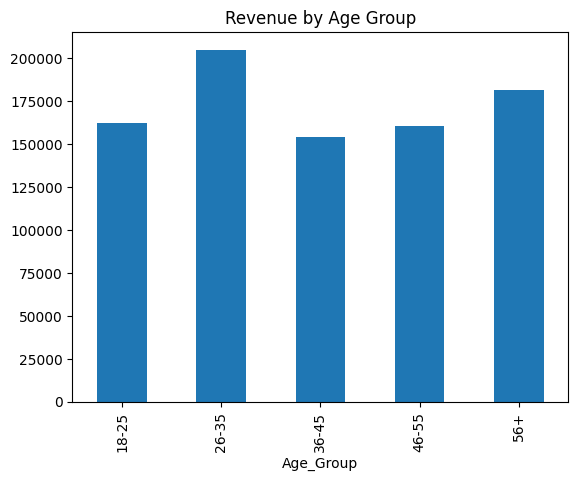

In [10]:
# STEP 10: Demographics analysis

demo_summary = sales.groupby("Age_Group")["Revenue"].sum()

demo_summary.plot(kind="bar")
plt.title("Revenue by Age Group")
plt.show()